### Import the required libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

### Importing the dataset

In [27]:
df = pd.read_csv("/content/sample_data/blinkit_data.csv")

In [28]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [29]:
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


### Detail of Dataset

In [30]:
print("The Metatdata of the dataset:",df.shape)

The Metatdata of the dataset: (8523, 12)


In [31]:
print("No.of Rows in the dataset:",df.shape[0])

No.of Rows in the dataset: 8523


In [32]:
print("No.of Column in the dataset:",df.shape[1])

No.of Column in the dataset: 12


### All Columns of Dataset

In [33]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

### Column's information

In [ ]:
df.info

### Column datatype

In [35]:
df.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


### Statictics of Dataset

In [36]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,12.857645,140.992782,3.965857
std,8.371760,0.051598,4.643456,62.275067,0.605651
min,1998.000000,0.000000,4.555000,31.290000,1.000000
25%,2000.000000,0.026989,8.773750,93.826500,4.000000
50%,2012.000000,0.053931,12.600000,143.012800,4.000000
75%,2017.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


### Finding the Duplicates

In [37]:
df.duplicated().sum()

np.int64(0)

### Finding the Nulls

In [38]:
df.isna().sum()

,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,1463


### Data Cleaning - 'LF' and 'reg' in 'Item Fat Content' values

In [39]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})
print("\
Unique values in Item Fat Content after standardization:")
print(df['Item Fat Content'].unique())

Unique values in Item Fat Content after standardization:
['Regular' 'Low Fat']


### KPI Requirement

In [40]:
# Calculate Total Sales
total_sales = df['Sales'].sum()
# Calculate Average Sales
avg_sales = df['Sales'].mean()
# Calculate Number of Items Sold
num_items_sold = df['Sales'].count()
# Calculate Average Ratings
avg_ratings = df['Rating'].mean()

# Display KPIs
print(f"Total Sales: {total_sales:.2f}")
print(f"Average Sales per Item: {avg_sales:.2f}")
print(f"Number of Items Sold: {num_items_sold}")
print(f"Average Rating: {avg_ratings:.2f}")

Total Sales: 1201681.48
Average Sales per Item: 140.99
Number of Items Sold: 8523
Average Rating: 3.97


### Chart's Requiremnet

### Total Sales distribution by Fat Content(Donut Chart)

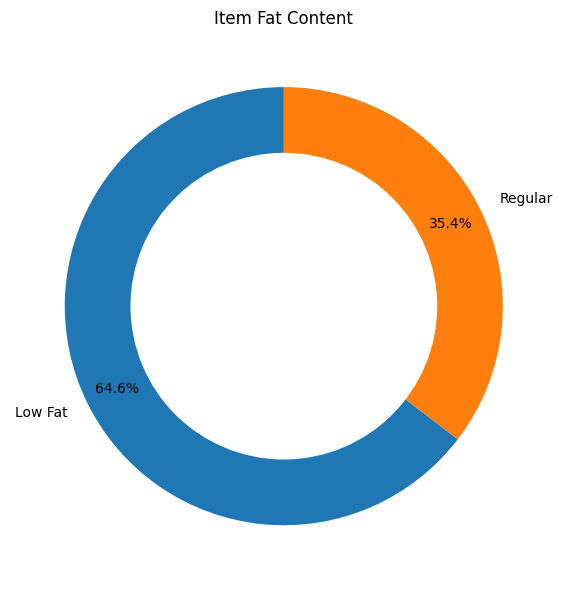

In [41]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(sales_by_fat, labels=sales_by_fat.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Item Fat Content')
plt.tight_layout()
plt.show()

### Total Sales by Item Type (Bar Chart)

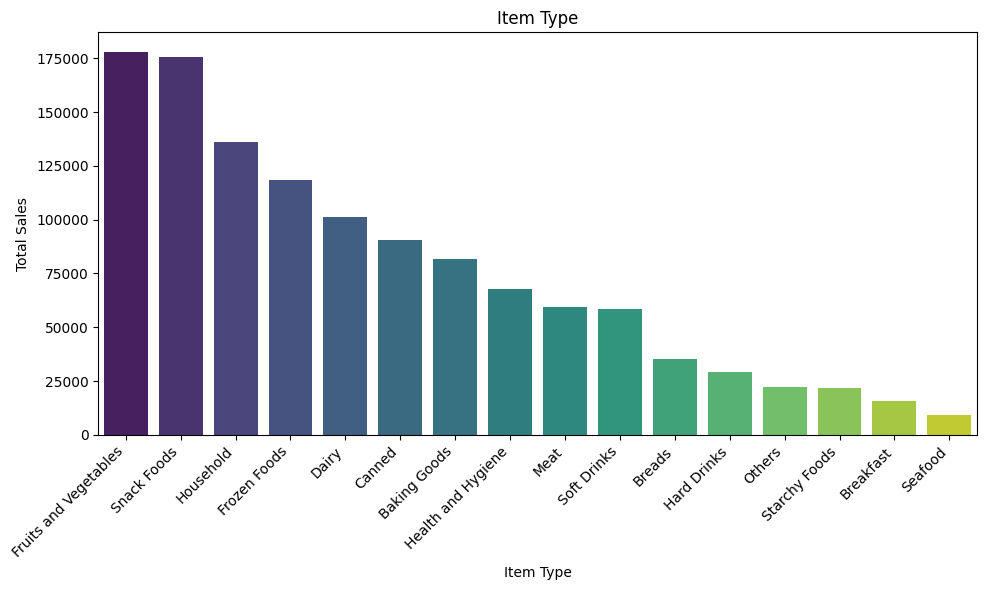

In [42]:
sales_by_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=sales_by_type.index, y=sales_by_type.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Item Type')
plt.tight_layout()
plt.show()

### Fat Content by outlet tier for total sales(Cluster Bar Chart)

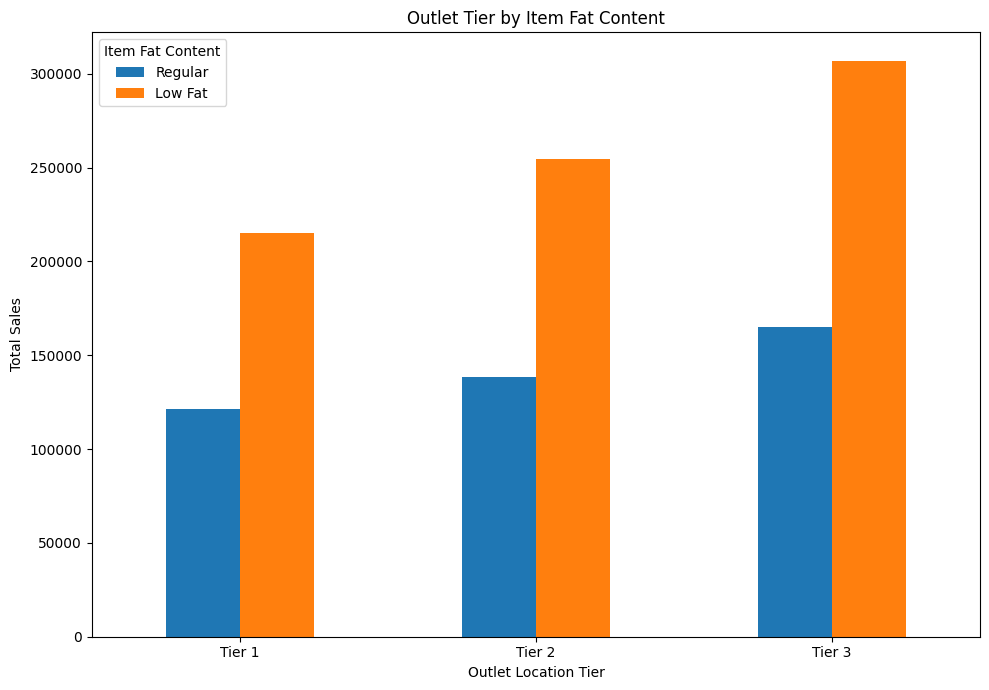

In [43]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack('Item Fat Content')
grouped = grouped[['Regular', 'Low Fat']]

grouped.plot(kind='bar', figsize=(10,7))
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.title('Outlet Tier by Item Fat Content')
plt.xticks(rotation=0)
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

### Total Sales by Outlet Establishment (Line Chart)

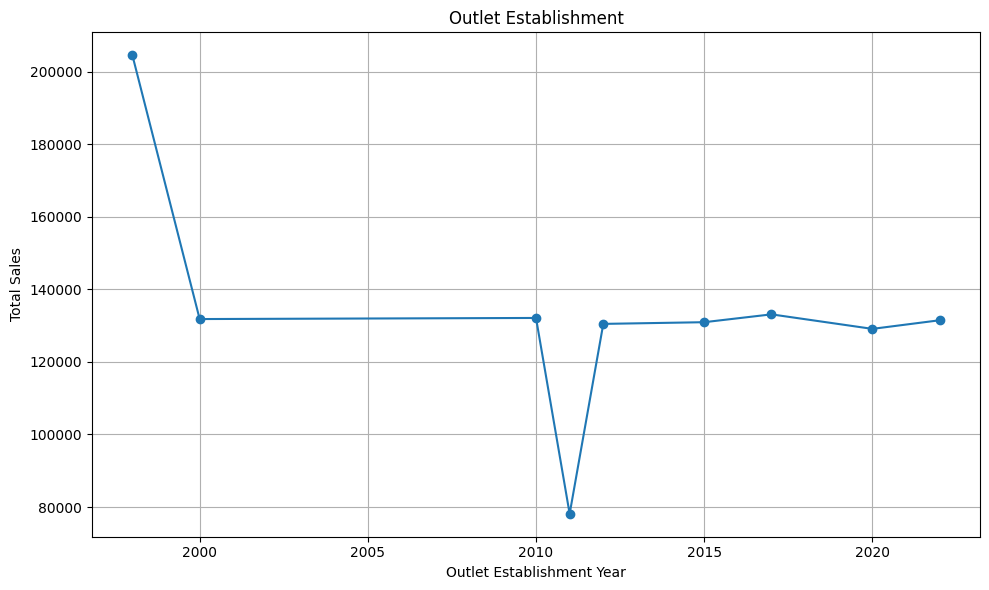

In [44]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(10,6))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')
plt.grid(True)
plt.tight_layout()
plt.show()

### Sales by Outlet Size(Donut Chart)

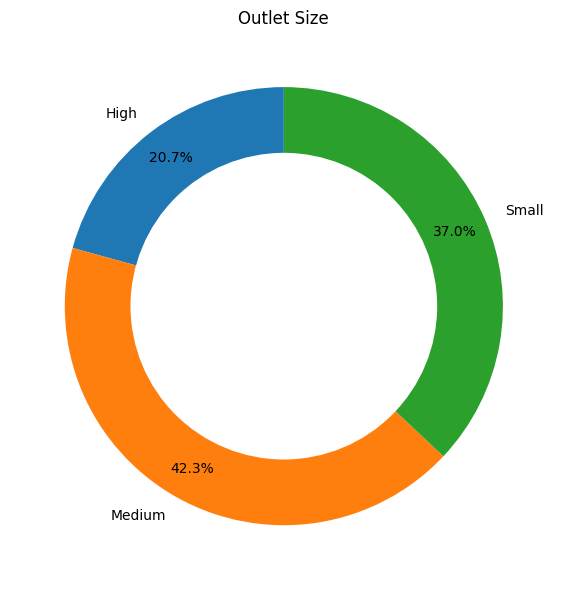

In [45]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()
fig, ax = plt.subplots(figsize=(6,6))
wedges, texts, autotexts = ax.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('Outlet Size')
plt.tight_layout()
plt.show()

### Sales by Outlet Location(Funnel Chart)

In [46]:
import plotly.express as px
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)

funnel_fig = px.funnel(sales_by_location,
                x='Sales',
                y='Outlet Location Type',
                title='Outlet Location')
funnel_fig.show()

### All Matrix by outlet type

In [47]:
grouped_metrics = df.groupby('Outlet Type').agg({
    'Sales': ['sum', 'mean', 'count'],
    'Rating': 'mean'  })

grouped_metrics.columns = ['Total Sales', 'Average Sales', 'Number of Items', 'Average Rating']
grouped_metrics = grouped_metrics.reset_index()

print("\nMatrix Card: Key Metrics by Outlet Type")
print(grouped_metrics)


Matrix Card: Key Metrics by Outlet Type
         Outlet Type  Total Sales  Average Sales  Number of Items  \
0      Grocery Store  151939.1470     140.294688             1083   
1  Supermarket Type1  787549.8868     141.213894             5577   
2  Supermarket Type2  131477.7724     141.678634              928   
3  Supermarket Type3  130714.6746     139.801791              935   

   Average Rating  
0        3.985873  
1        3.963242  
2        3.971228  
3        3.952941  


### Display by Matrix card

In [50]:
import matplotlib.font_manager as fm
from IPython.display import display
display(grouped_metrics.style.format({'Total Sales': '{:.2f}', 'Average Sales': '{:.2f}', 'Average Rating': '{:.2f}'}))

,Outlet Type,Total Sales,Average Sales,Number of Items,Average Rating
0,Grocery Store,151939.15,140.29,1083,3.99
1,Supermarket Type1,787549.89,141.21,5577,3.96
2,Supermarket Type2,131477.77,141.68,928,3.97
3,Supermarket Type3,130714.67,139.80,935,3.95
